In [1]:
!make -C .. scenarios scenario_metrics

make: Entering directory '/home/martibosch/data-science/lausanne-greening-scenarios'
make: Nothing to be done for 'scenarios'.
make: Nothing to be done for 'scenario_metrics'.
make: Leaving directory '/home/martibosch/data-science/lausanne-greening-scenarios'


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [3]:
scenario_ds_filepath = '../data/processed/scenarios.nc'
scenario_metrics_filepath = '../data/processed/scenario-metrics.csv'

In [4]:
metrics = [
    'proportion_of_landscape', 'area_mn', 'shape_index_mn', 'edge_density'
]
metric_label_dict = {
    'proportion_of_landscape': 'PLAND',
    'area_mn': 'AREA_MN',
    'shape_index_mn': 'SHAPE_MN',
    'edge_density': 'ED'
}

In [5]:
scenario_T_df = xr.open_dataset(scenario_ds_filepath)['T'].mean(
    dim=['x', 'y']).to_dataframe().reset_index()
scenario_metrics_df = pd.read_csv(scenario_metrics_filepath).rename(
    columns=metric_label_dict)
scenario_df = pd.merge(scenario_T_df, scenario_metrics_df)

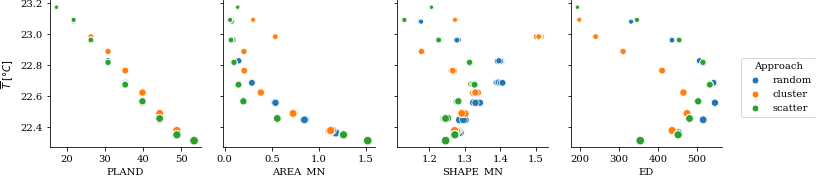

In [6]:
g = sns.PairGrid(scenario_df,
                 x_vars=metric_label_dict.values(),
                 y_vars=['T'],
                 hue='interaction')
g.map(sns.scatterplot, data=scenario_df, size='PLAND')
g.axes.flat[0].set_ylabel('$\\overline{T} \; [\degree C]$')
g.add_legend(title='Approach', bbox_to_anchor=(1.02, .5), frameon=True)
g.fig.savefig('../reports/figures/scenario-metrics.pdf')